# Quantenanalog


## Einleitung

In diesem Dokument sind die Schritte für die ferngesteuerte Verwendung des Quantenanaloges beschrieben. Einige Abschnitte, wie die Installation und der Start der Dienste auf dem Raspberry Pi sind für die Studierenden nicht wichtig, aber zur Vollständigkeit aufgeführt. Die anderen Abschnitte sollten zur Nutzung des Versuches durchgearbeitet werden. Es wird auch auf die zur Steuerung verwendeten Schnittstellen und Funktionen eingegangen.

## Hinweise zum Umgang mit Jupyter-Notebook

Das Experiment wird mittels eines Jupyter-Notebooks gesteuert. Für die Nutzung werden in diesem Abschnitt einige Hinweise gegeben. 

### Allgemein
Bei Jupyter-Notebook handelt es sich um eine Schnittstelle zu einem Python-Prozess. Der Prozess kann dabei auf dem eigenen Computer oder auf einem anderen Computer (hier einem Raspberry Pi) laufen.

Der Code wird dabei nacheinander in Zellen ausgeführt. Alternativ lassen sich in den Zellen Schritte kommentieren und Gleichungen aufschreiben. Dafür wird Markdown (https://markdown.de/), LaTeX-Syntax (für Gleichungen bspw. $E=mc^2$) oder HTML verwendet.

Eine neue Zelle kann über den Button <img src="QA_neue_Zelle.png"> erstellt werden.

Der in einer Zelle aufgeführte Code wird mit ``SHIFT`` + ``ENTER`` ausgeführt. Die dabei erstellten Variablen bleiben für weitere Rechenschritte erhalten.

Einige weitere nützliche Tastenkombinationen sind in der folgenden Tabelle aufgeführt.


Funktion | Tastenkombination
      :--|:---
neue Zelle oberhalb einfügen | ``a`` (im Navigationsmodus)
neue Zelle unterhalb einfügen | ``b`` (im Navigationsmodus)
Löschen einer Zelle | doppelt ``d`` (im Navigationsmodus)
Ausführen einer Zelle | ``SHIFT`` + ``ENTER``

Für weitere Informationen zu Jupyter-Notebook sei beispielsweise auf die folgenden Internetseiten verwiesen:
* https://realpython.com/jupyter-notebook-introduction/
* https://jupyter-notebook.readthedocs.io/en/stable/index.html

### Erweiterungen

Für Jupyter-Notebook sind Erweiterungen vorhanden, von denen drei hier Installiert sind und über die folgenden Schaltflächen aktiviert werden können:

<img src="QA_Erweiterungen.png">

* Die erste Erweiterung aktiviert Zeilennummern in den Code-Zellen, was die Kommunikation bei geteiltem Bildschirm vereinfacht.
* Über den Variablen-Inspector werden die momentan im Prozess vorhandenen Variablen angezeigt.
* Es kann ein Inhaltsverzeichnis angezeigt werden, welches die Navigation im Dokument erleichtert.

### Herunterladen von Messdaten
Das Kopieren der Daten vom Raspberry Pi auf den eigenen Computer kann direkt über den Browser geschehen:
* ``File`` $\rightarrow$ ``Open...``
* zur Datei navigieren
* Datei mit Kästchen auswählen
* Download

## Vorbereitung

### Installation auf dem Rasperry Pi

Die folgenden Schritte müssen bei der Neueinrichtung des Raspberry Pis für das Experiment durchgeführt werden. Für den Fernzugriff ist keine Softwareinstallation auf den Computern der Studierenden notwendig. 

* Jupyter-Notebook installieren
    * ``sudo pip3 install --upgrade pip``
    * ``sudo pip3 install jupyter``

* Sounddevice installieren
    * ``pip3 install sounddevice``
    * Download PortAudio http://files.portaudio.com/download.html
    * ``cd portaudio``
    * ``./configure``
    * ``sudo make install``
    * ``sudo apt-get install libportaudio2``

* Weitere Bibliotheken installieren
    * ``pip3 install matplotlib``
    * ``pip3 install numpy``
    * ``pip3 install scipy``
* Erweiterungen für Jupyter-Notebook installieren
    * ``sudo pip3 install jupyter_contrib_nbextensions``
    * ``jupyter contrib nbextension install --user``
    * ``jupyter nbextension enable toc2/main`` (Inhaltsverzeichnis)
    * ``jupyter nbextension enable varInspector/main`` (Variablenbetrachter)
    * ``jupyter nbextension enable toggle_all_line_numbers/main`` (Zeilennummerierung)
    
* Motion installieren und konfigurieren (Programm zum Erstellen eines Streams der Webcam)
    * Einrichtung erfolgt nach https://tutorials-raspberrypi.de/raspberry-pi-ueberwachungskamera-livestream-einrichten/
    * ``sudo apt-get install motion -y``
    * ``sudo nano /etc/motion/motion.conf`` Anpassung einiger Einstellungen
        * ``daemon on``
        * ``stream_localhost off``
        * ``target_dir /home/pi/Monitor``
    * ``sudo nano /etc/default/motion`` ersetzen von 'no' durch 'yes'
        * ``start_motion_daemon=yes``
    * ``mkdir /home/pi/Monitor``
    * ``sudo chgrp motion /home/pi/Monitor``
    * ``chmod g+rwx /home/pi/Monitor``
* Dynamisches DNS
    * Falls der Zugriff über dynamisches DNS erfolgt, ist auch die Einrichtung eines DNS-Clients notwendig.
    * ``sudo apt-get install ddclient``

### Aufbau

Der experimentelle Aubau wird über ein 12 V-Netzteil versorgt, welches diese Spannung direkt an den Treiber des Schrittmotors und über einen Step-Down Konverter (auf 5 V) an den Raspberry Pi weitergibt. Auf dem Raspberry Pi läuft der Jupyer-Notebook Server. Mit drei Pins der GPIO-Schnittstelle kann aus Python heraus über einen Pegelwandler mit dem Treiber des Schrittmotors kommuniziert werden.

Der Schrittmotor kann den Kugelresonator über einen auf dem Resonator sitzenden Zahnkranz drehen.
Der Winkel des Resonators wird über den Raspberry Pi mit einer Webcam übertragen.

Die Ansteuerung von Mikrophon und Lautsprecher im Kugelresonator geschieht über eine USB-Soundkarte, auf welche ebenfalls über den Jupyter-Notebook Server zugegriffen werden kann.

In den folgenden Graphiken ist der Versuchsaufbau abgebildet.

<img src="QA_Aufbau1.png">

<img src="QA_Aufbau2.png">

### Start der Dienste

Die folgenden Programme werden auf dem Raspberry Pi vor Beginn des Experimentes gestartet.

* Jupyter-Notebook im Netzwerk starten
    * ``jupyter-notebook --ip 192.168.1.123 --port 8888`` mit der tatsächlichen IP des Raspberry Pis im lokalen Netzwerk.
    * Das Notebook ist dann innerhalb des lokalen Netzwerkes über den Port 8888 erreichtbar http://192.168.1.123:8888 .
    * Erfolgt der Zugriff von außerhalb muss durch den Router auf den entsprechenden Port weitergeleitet werden.
* Motion starten
    * ``sudo motion start``
    * Die Webcam ist dann innerhalb des lokalen Netzwerkes über den Port 8081 erreichbar http://192.168.1.123:8081 .
    * Erfolgt der Zugriff von außerhalb muss durch den Router auf den entsprechenden Port weitergeleitet werden.
* Dynamisches DNS
    * ``sudo ddclient``
    * In diesem Fall sind Jupyer-Notebook und Kamera erreichbar unter http://quantenanalog.exphy.de:8888 und http://quantenanalog.exphy.de:8081 .

## Steuerung

Für die Steuerung des Quantenanaloges können Mikrophon, Lautsprecher und Resonator-Winkel mit Python angesteuert werden. In diesem Abschnitt wird auf die konkrete Umsetzung eingegangen. Die hier aufgeführten Funktionen müssen vor Beginn der Messungen ausgeführt und damit definiert werden.

### Ton
Der Betrieb von Mikrophon und Lautsprecher erfolgt über eine USB-Soundkarte und die Bibliothek Sounddevice (https://python-sounddevice.readthedocs.io/).

In [ ]:
import sounddevice as sd

Zu Beginn können die vorhandenen Audio-Schnittstellen angezeigt werden:

In [4]:
sd.query_devices()

   0 bcm2835 HDMI 1: - (hw:0,0), ALSA (0 in, 8 out)
   1 bcm2835 Headphones: - (hw:1,0), ALSA (0 in, 8 out)
*  2 USB Audio Device: - (hw:2,0), ALSA (1 in, 2 out)
   3 sysdefault, ALSA (0 in, 128 out)
   4 lavrate, ALSA (0 in, 128 out)
   5 samplerate, ALSA (0 in, 128 out)
   6 speexrate, ALSA (0 in, 128 out)
   7 pulse, ALSA (32 in, 32 out)
   8 upmix, ALSA (0 in, 8 out)
   9 vdownmix, ALSA (0 in, 6 out)
  10 dmix, ALSA (0 in, 2 out)
  11 default, ALSA (32 in, 32 out)

Die USB Sounkarte ``USB Audio Device`` wird nun entsprechend ihrer Nummer ausgewählt. Die Nummer muss in folgender Zelle ggf. angepasst werden.

In [ ]:
sd.default.device = 2

Für dieses Experiment ist das zentrale Element dieser Bibliothek die Funktion

``sd.playrec(Signal, SampleRate, channels=1)``,

welche eine Signal in Form eines numpy-Arrays übergeben bekommt und abspielt. Zeitgleich wird eine Aufnahme durchgeführt und das Ergebnis durch die Funktion zurückgegeben. Dabei ist zu beachten, dass im Anschluss direkt
``sd.wait()`` ausgeführt werden sollte, damit das Programm wartet, bis der Aufnahme-Vorgang abgeschlossen ist.

Die folgenden Funktionen der PG454 geben mit dieser Bibliothek verschiedene Signalformen aus. Ebenso wurde ein vereinfachter Aufruf für eine Fouriertransformation ``doFFT()`` implementiert. Die Funktionen können gerne kommentiert und erweitert werden.

In [ ]:
import sounddevice as sd
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Ausgabe eines Sinus-Signals
def PlaySine(Frequency, Duration):
    fs = 44100
    t = np.linspace(0,Duration,fs*Duration)
    signal = 0.9*np.sin(t*Frequency*2*np.pi)
    myrecording = sd.playrec(signal, fs, channels=1)
    sd.wait()
    myrecording = myrecording[:,0]
    return myrecording

# Erzeugen von weißem Rauschen
def white_noise(time_length):
    fs = 44100
    mean = 0
    std = 1 
    num_samples = int(time_length*fs)
    return np.random.normal(mean, std, size=num_samples)

# Ausgabe von weißem Rauschen
def Noise(Duration):
    fs = 44100
    fmax = 10000.0
    Factor = fmax/Duration
    t = np.linspace(0,Duration,fs*Duration)
    signal = white_noise(Duration)
    myrecording = sd.playrec(signal, fs, channels=1)
    sd.wait() 
    myrecording = myrecording[:,0]
    return myrecording
                  
# Durchfahren eines Frequenz-Sweeps
def Sweep(Duration):
    fs = 44100
    fmax = 10000.0
    Factor = fmax/Duration
    t = np.linspace(0,Duration,fs*Duration)
    signal =  0.9*np.sin(t**2*Factor*2*np.pi)
    myrecording = sd.playrec(signal, fs, channels=1)
    sd.wait()
    myrecording = myrecording[:,0]
    return myrecording

# Durchführen einer FFT
def doFFT(Array):
    fs = 44100
    data = Array
    N = len(data)
    T = 1.0/fs 
    fmax = fs/2.0
    FT = scipy.fftpack.fft(data)
    yf = np.abs(FT[0:len(FT)//2]) 
    xf = np.linspace(0.0, fmax, N//2)
    return xf, yf

### Schrittmotor
Der Schrittmotor-Treiber ist über einen zwischengeschalteten Pegel-Wandler mit 3 Pins des Raspberry Pi verbunden.
* Der ``DIR``-Pin gibt die Richtung an, in welche sich der Schrittmotor drehen soll. Ein Zustand gibt einen rechten Drehsinn vor und ein Zustand einen linken Drehsinn.
* Der ``ENA``-Pin gibt vor, dass der Schrittmotor aktiviert wird. Die Spulen im Motor werden mit Strom versorgt und der Motor bringt sein Haltedrehmoment auf. Er kann also nicht gedreht werden. Dies ist für die Bewegung des Motors notwendig. Wird der Motor nicht bewegt kann der Motor deaktiviert werden.
* Eine Änderung am ``PUL``-Pin von 0 auf 1 löst die Bewegung des Motors um einen Schritt aus. Die Zeit zwischen diesen Änderungen gibt die Geschwindigkeit des Motors vor.

Im Folgenden werden die Grundeinstellungen für den Motor getätigt und eine Funktion definiert, welche die Bewegung des Motors um eine bestimmte Schrittzahl durchführt.

Das Zahnrad am Motor hat 17 Zähne und das am Kugelresonator 66 Zähne. Am Treiber des Schrittmotors sind Mikroschritte eingestellt, sodass für eine Umdrehung des Motors 6400 Schritte notwendig sind. Daraus lässt sich eine theoretische Schrittzahl pro Grad berechnen. Diese sollte jedoch mit der Kamera überprüft werden. Absolut stehen Mikrophon und Kamera in einem 90°-Winkel zueinander, wenn auf der Kamera ein Wert von 0° angezeigt wird.

Aufgrund des Spiels zwischen den beiden Zahnrädern sollte immer nur in eine Bewegungsrichtung gemessen werden.

In [ ]:
import RPi.GPIO as GPIO
import time
import numpy as np

GPIO.setmode(GPIO.BOARD)

DIR = 5
PUL = 7
ENA = 3

DIR_Left = GPIO.HIGH
DIR_Right = GPIO.LOW

ENA_Locked = GPIO.LOW
ENA_Released = GPIO.HIGH

GPIO.setwarnings(False)
GPIO.setup(DIR, GPIO.OUT)
GPIO.setup(PUL, GPIO.OUT)
GPIO.setup(ENA, GPIO.OUT)
GPIO.output(ENA, ENA_Released)

def go(steps):
    if (steps < 0):
        # Richtung festlegen
        GPIO.output(DIR, DIR_Right)
    else:
        # Richtung festlegen
        GPIO.output(DIR, DIR_Left)

    # Motor aktivieren und halten
    GPIO.output(ENA, ENA_Locked)

    for i in range(np.abs(steps)):
        # Puls modulieren
        GPIO.output(PUL, GPIO.HIGH)
        time.sleep(0.005)
        GPIO.output(PUL, GPIO.LOW)
        time.sleep(0.005)

    # Motor freigeben
    GPIO.output(ENA, ENA_Released)

## Nützliche Funktionen für Messung und Auswertung

### Kartesischer Plot

Text(0, 0.5, 'Sinus')

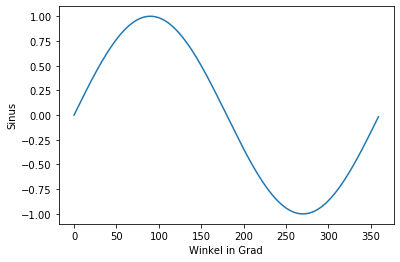

In [5]:
x_data = np.arange(0,360,1)
y_data = np.sin(np.deg2rad(x_data))
plt.plot(x_data,y_data)
plt.xlabel('Winkel in Grad')
plt.ylabel('Sinus')

### Polar-Plot und speichern als PDF

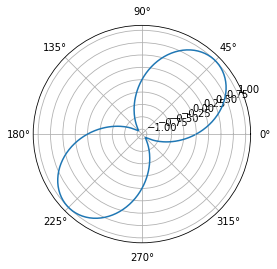

In [23]:
theta = np.deg2rad(np.arange(0,360,1))
r = np.sin(2*theta)
plt.polar(theta,r)
plt.savefig('MeinPolarPlot.pdf')

### Speichern einer wav-Datei

In [ ]:
from scipy.io.wavfile import write

# Beispielsignal
Duration = 2
Frequency = 5000
t = np.linspace(0,Duration,44100*Duration)
signal = 0.9*np.sin(t*Frequency*2*np.pi)

# Abspeichern
write('MeineWaveDatei.wav', 44100, signal)

### Speichern eines numpy-Arrays

In [ ]:
x_data = np.arange(0,360,1)
data = np.sin(np.deg2rad(x_data))
np.savetxt('MeineDaten.txt', data, delimiter=',' )

### Einlesen eines numpy-Arrays

In [ ]:
f = np.loadtxt('MeineDaten.txt', delimiter=',' )

## Umsetzung der Messungen durch die Gruppen
Für die Speicherung der Daten einen Unterordner mit der Gruppennummer anlegen und dort abspeichern.
Bitte in einer Kopie dieser Datei arbeiten und die Kopie ebenfalls im Gruppenordner abspeichern.